In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
m2v_xgboost_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_1.csv')
m2v_xgboost_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_2.csv')
m2v_xgboost_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_3.csv')
m2v_xgboost_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_4.csv')
m2v_xgboost_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_5.csv')
m2v_xgboost_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_esol_total_fold_6.csv')
# concat the data, rename columns (actual=experimentally determined value)
m2v_xgboost = pd.concat((m2v_xgboost_1, m2v_xgboost_2, m2v_xgboost_3, m2v_xgboost_4, m2v_xgboost_5, m2v_xgboost_6), axis=0)
m2v_xgboost = m2v_xgboost.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_xgboost['actual'], m2v_xgboost['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_xgboost['actual'], m2v_xgboost['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_xgboost['actual'], m2v_xgboost['predict']))

0.6816218024134615
0.918568893438502
0.8078622370215472


In [4]:
len(m2v_xgboost)

1144

In [5]:
# calculate the residual value for each molecule
m2v_xgboost['residual']= m2v_xgboost['predict'] - m2v_xgboost['actual']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_xgboost['residual']**2).sum()/(len(m2v_xgboost)-2))
sdr

0.9193728926238774

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value
m2v_xgboost['std_residual'] = m2v_xgboost['residual']/sdr
m2v_xgboost['std_residual']

0     -0.132990
1      0.657535
2      1.351232
3      1.177826
4      0.578505
         ...   
185    0.524895
186   -0.835473
187    0.011939
188    0.671582
189   -0.183851
Name: std_residual, Length: 1144, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_xgboost_outliers = m2v_xgboost.loc[abs(m2v_xgboost['std_residual']) > n]
m2v_xgboost_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
50,50,296,296,296,CCCCC(C)CC,296,-5.160,-2.344770,2.815230,3.062120
103,103,566,566,566,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,566,-6.960,-4.179261,2.780739,3.024604
165,165,948,948,948,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4,948,-2.900,-5.675324,-2.775324,-3.018715
99,99,557,557,557,C1CCC2CCCCC2C1,557,-5.190,-2.176629,3.013371,3.277637
106,106,599,599,599,CCN(CC)C(=O)C(=CCOP(=O)(OC)OC)Cl,599,0.523,-3.080544,-3.603544,-3.919567
3,3,9,9,9,C1CCc2ccccc2C1,9,-4.370,-1.442106,2.927894,3.184664
22,22,116,116,116,Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...,116,-11.600,-8.045213,3.554787,3.866534
67,67,399,399,399,Cc1cc(=O)n(c2ccccc2)n1C,399,0.715,-2.966438,-3.681438,-4.004293
160,160,990,990,990,CCNP(=S)(OC)OC(=CC(=O)OC(C)C)C,990,-3.408,-0.423997,2.984003,3.245694
41,41,225,225,225,CC=C(C)C,225,-2.560,0.310238,2.870238,3.121952


In [9]:
m2v_xgboost_outliers.to_csv('m2v_xgboost_esol_outliers3.csv')

In [12]:
# Set the default text font size
plt.rc('font', size=22)

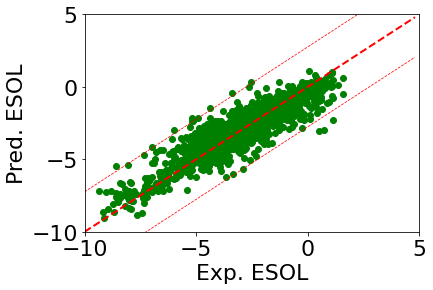

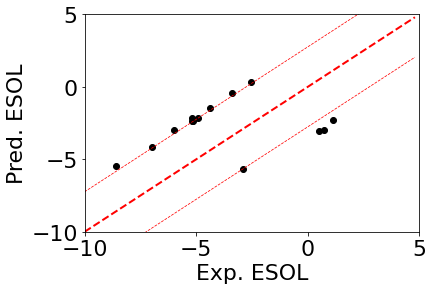

In [13]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost['actual'], y=m2v_xgboost['predict'], color='green')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_outliers['actual'], y=m2v_xgboost_outliers['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

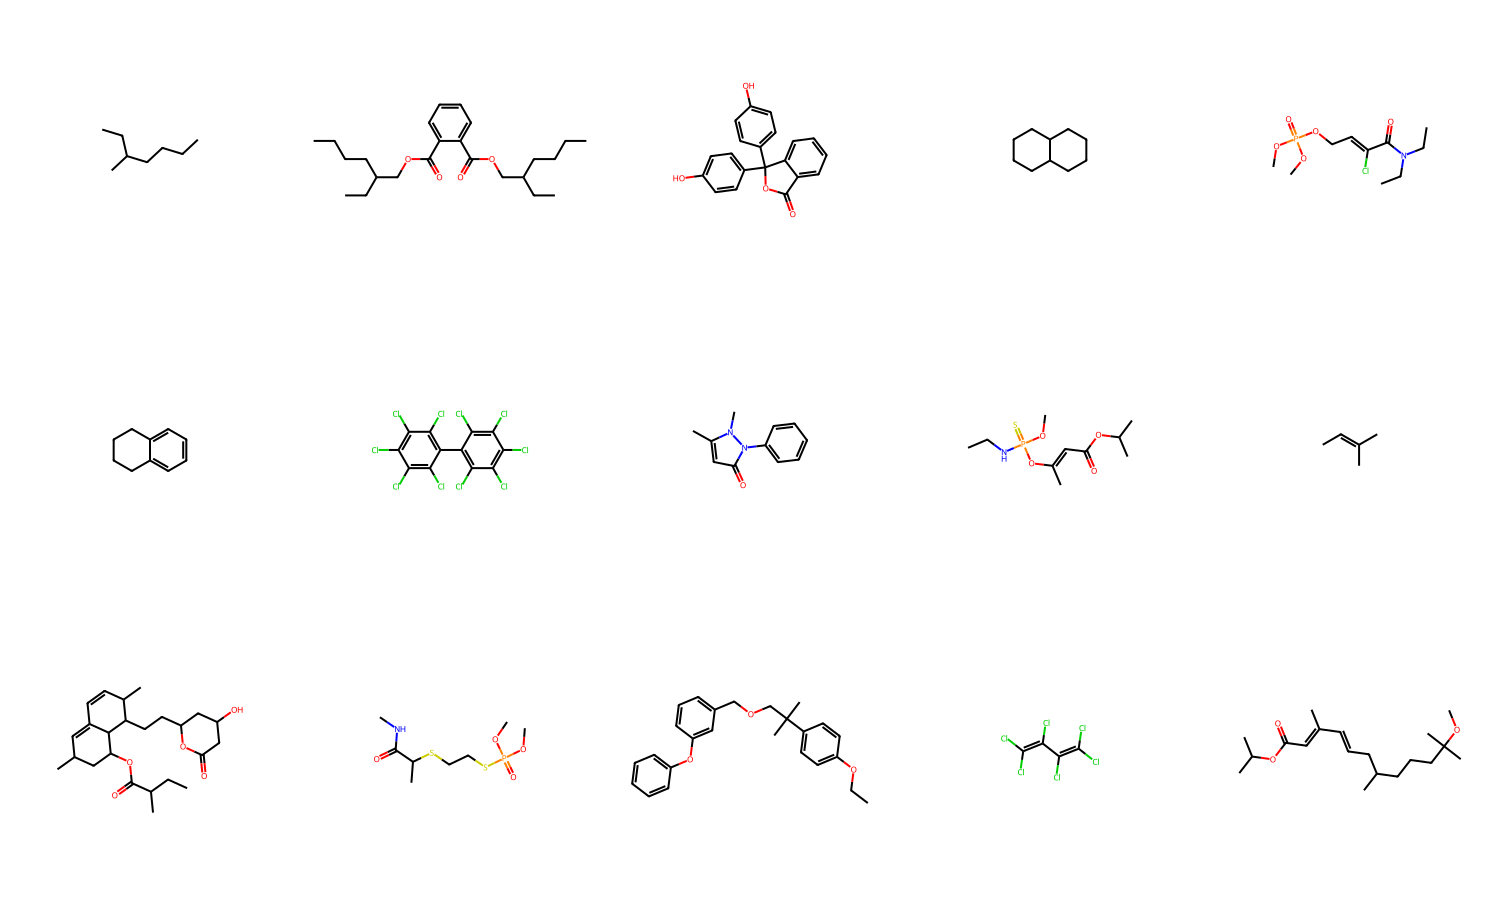

In [14]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in m2v_xgboost_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [15]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_xgboost_outliers2 = m2v_xgboost.loc[abs(m2v_xgboost['std_residual']) > n]
m2v_xgboost_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
24,24,139,139,139,CCCC(C)(C)C,139,-4.360,-2.168426,2.191574,2.383771
41,41,247,247,247,CC1CCCO1,247,0.110,-1.947699,-2.057699,-2.238155
50,50,296,296,296,CCCCC(C)CC,296,-5.160,-2.344770,2.815230,3.062120
69,69,390,390,390,COc1ccc(cc1)C(O)(C2CC2)c3cncnc3,390,-2.596,-5.062378,-2.466378,-2.682674
89,89,519,519,519,c1cc2ccc3ccc4ccc5ccc6ccc1c7c2c3c4c5c67,519,-9.332,-7.214249,2.117751,2.303474
...,...,...,...,...,...,...,...,...,...,...
120,120,744,744,744,COP(=S)(OC)Oc1cc(Cl)c(I)cc1Cl,744,-6.620,-4.357379,2.262621,2.461048
126,126,775,775,775,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,775,-4.640,-2.670446,1.969554,2.142280
135,135,806,806,806,COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C,806,-5.190,-2.358880,2.831120,3.079404
165,165,1025,1025,1025,Cc3cc2nc1c(=O)[nH]c(=O)nc1n(CC(O)C(O)C(O)CO)c2...,1025,-3.685,-6.247817,-2.562817,-2.787570


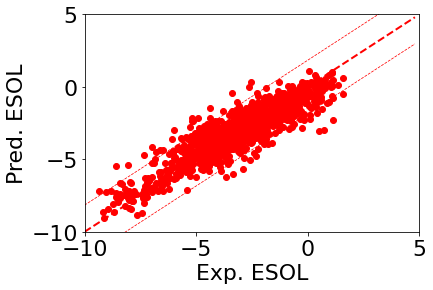

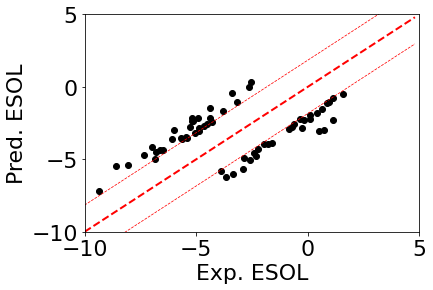

In [16]:
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement.
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost['actual'], y=m2v_xgboost['predict'], color='red')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-10, 5, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_outliers2['actual'], y=m2v_xgboost_outliers2['predict'], color='black')
plt.xlabel('Exp. ESOL')
plt.ylabel('Pred. ESOL')
plt.xlim([-10,5])
plt.ylim([-10,5])
plt.show()

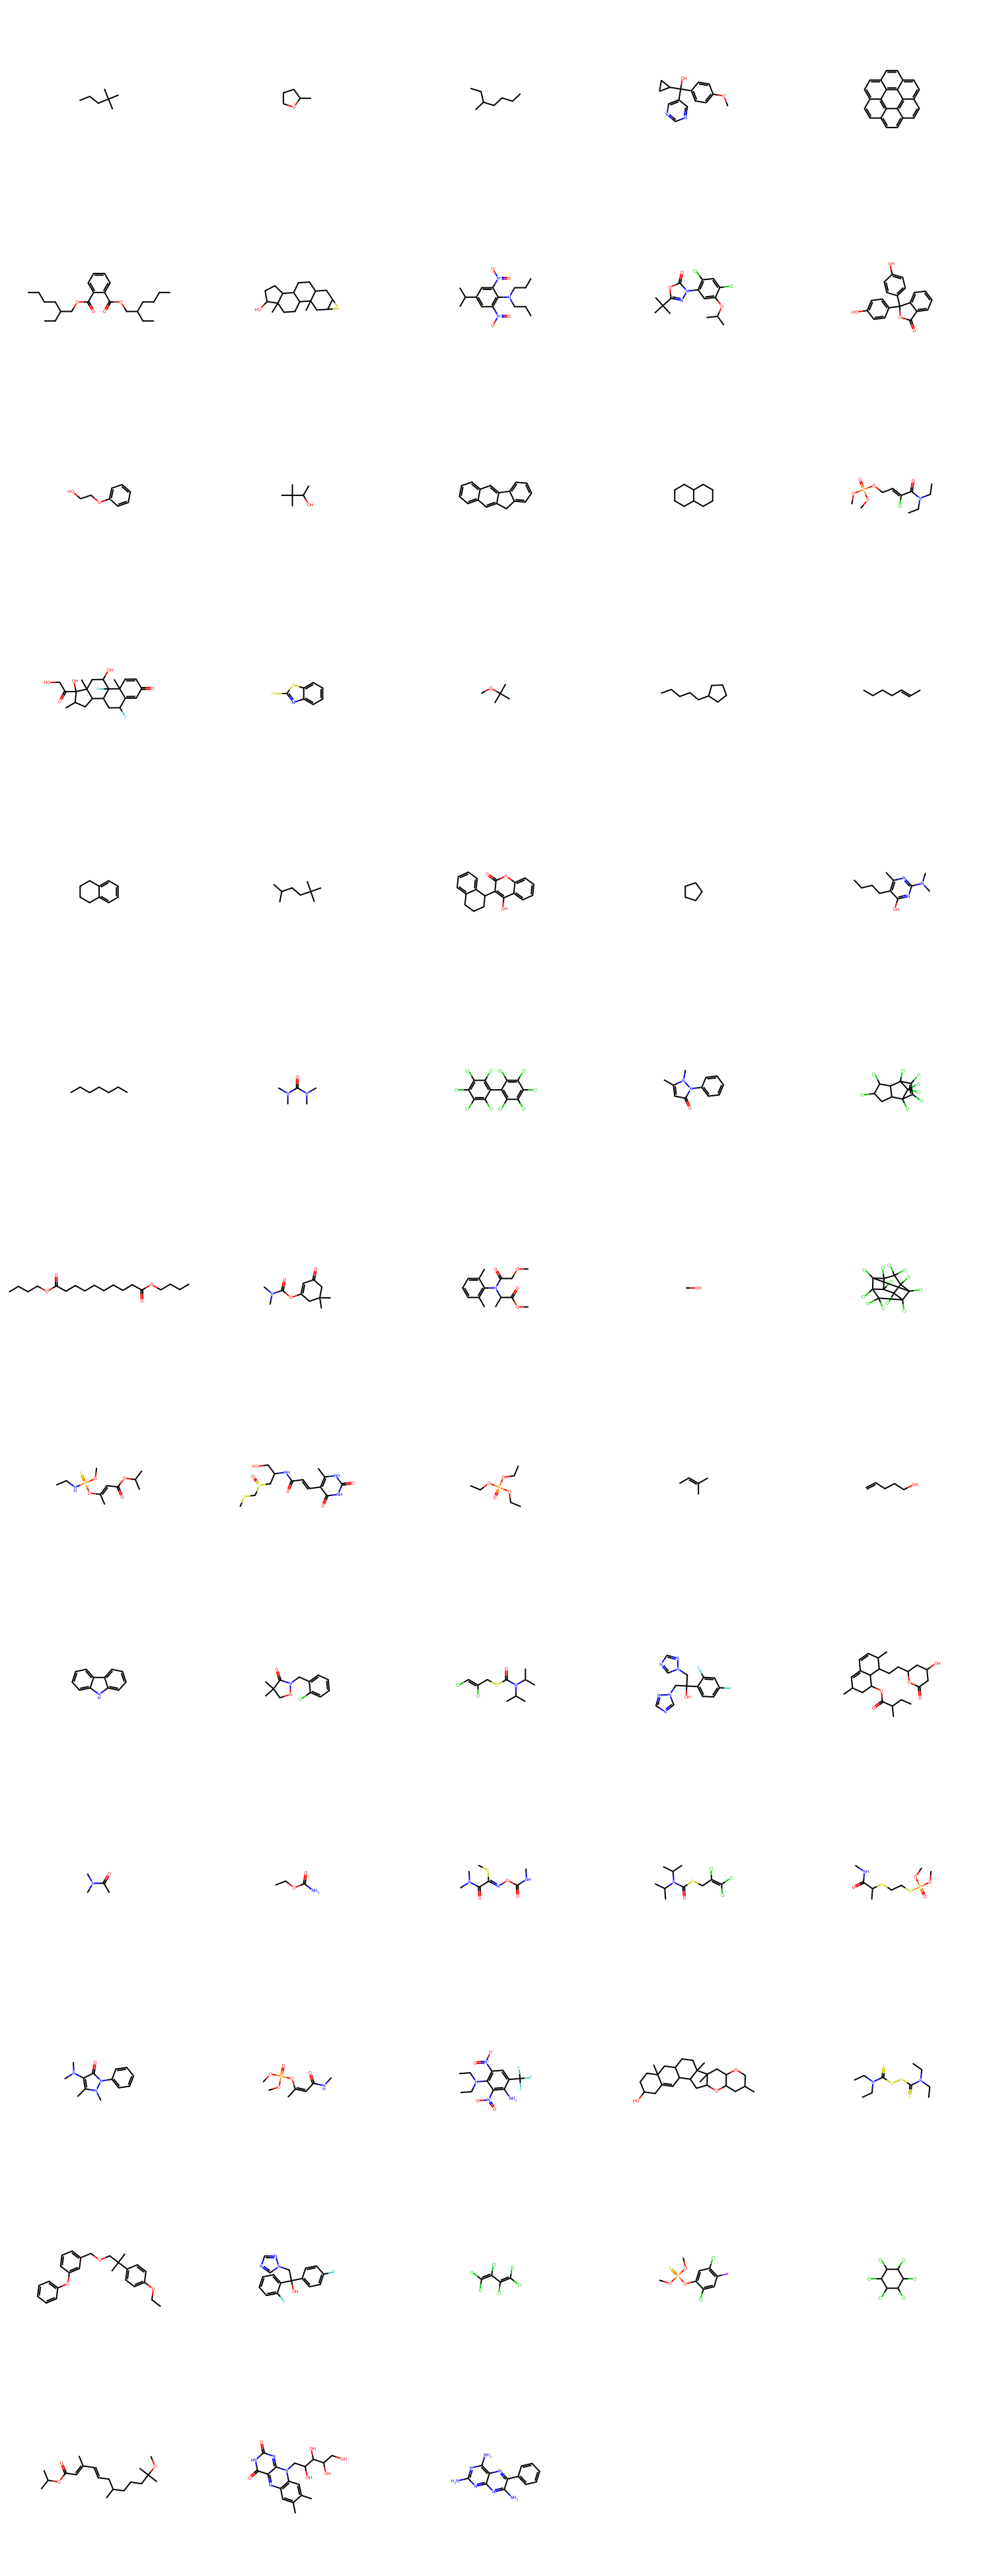

In [14]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [15]:
# save outliers (n=2) info to a csv file
m2v_xgboost_outliers2.to_csv('m2v_xgboost_esol_outliers2.csv')

In [17]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/bert_finetune/esol.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_xgboost_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

204.1519488730402
241.9848795457778


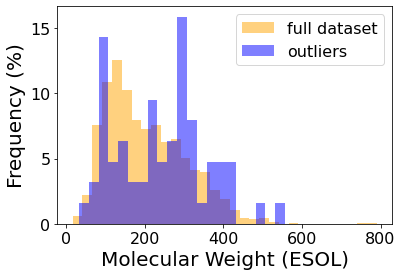

In [18]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (ESOL)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()